# Zad.
Pytamy się jakie są naturalne grupy w postach. Bierzemy zbiór 20newsgroups.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### wczytaj dane

In [68]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups(subset='all', shuffle=True)#, remove=('headers', 'footers', 'quotes'))

In [69]:
twenty.description

'the 20 newsgroups by date dataset'

In [70]:
twenty.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Wypisz pierwszy post

In [71]:
print(twenty.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




ZADANIE: Zbiór jest dość duży. Weź po 50 przykładów z każdej z klas dla 5 kategorii. Wynik zapisz w

 * X_set
 * y_set
 


In [72]:
#grupuje dane z kolejnych klas razem

data = []
for j in range(len(twenty.target_names)):
    data.append([twenty.data[i] 
                 for i in range(twenty.target.shape[0]) 
                 if twenty.target[i] == j])
len(data)

20

In [73]:
#biore okreslona ilosc danych z kazdej klasy

categories = 5
num=50
X_set = []
Y_set =[]
for i in range(categories):
    X_set = X_set + data[i][:num]
    Y_set = Y_set + [i]*num

In [51]:
Y_set[:6]

[0, 0, 0, 0, 0, 0]

ZADANIE: Proszę zwektoryzować dane

In [74]:
#wektoryzuje dane
import string
import collections
 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
def process_text(text, stem=True):
    """ Tokenize text and stem words removing punctuation """
    tokens = word_tokenize(text)
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens] 
    return tokens
""" Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
vectorizer = TfidfVectorizer(tokenizer=process_text,
                             stop_words=stopwords.words('english'),
#                              max_df=0.5,
                             min_df=0.05,
                             lowercase=True)

X_vectors = vectorizer.fit_transform(X_set)
    

 

In [75]:
print(X_vectors.shape)
print(len(Y_set))

(250, 357)
250


In [76]:
np.unique(Y_set)

array([0, 1, 2, 3, 4])

# Zad. 

Wykonajmy grupowanie danych metodą hierarchiczną.

Użyj odległości:
    
   * 'euclidean'
   * 'cosine'
    
Dlaczego odległość 'euclidean' jest gorsza od 'cosine'?

In [61]:
d = pdist(df, metric='cosine')
np.nan_to_num(d, copy = False)
np.isnan(d).any()


False

In [77]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

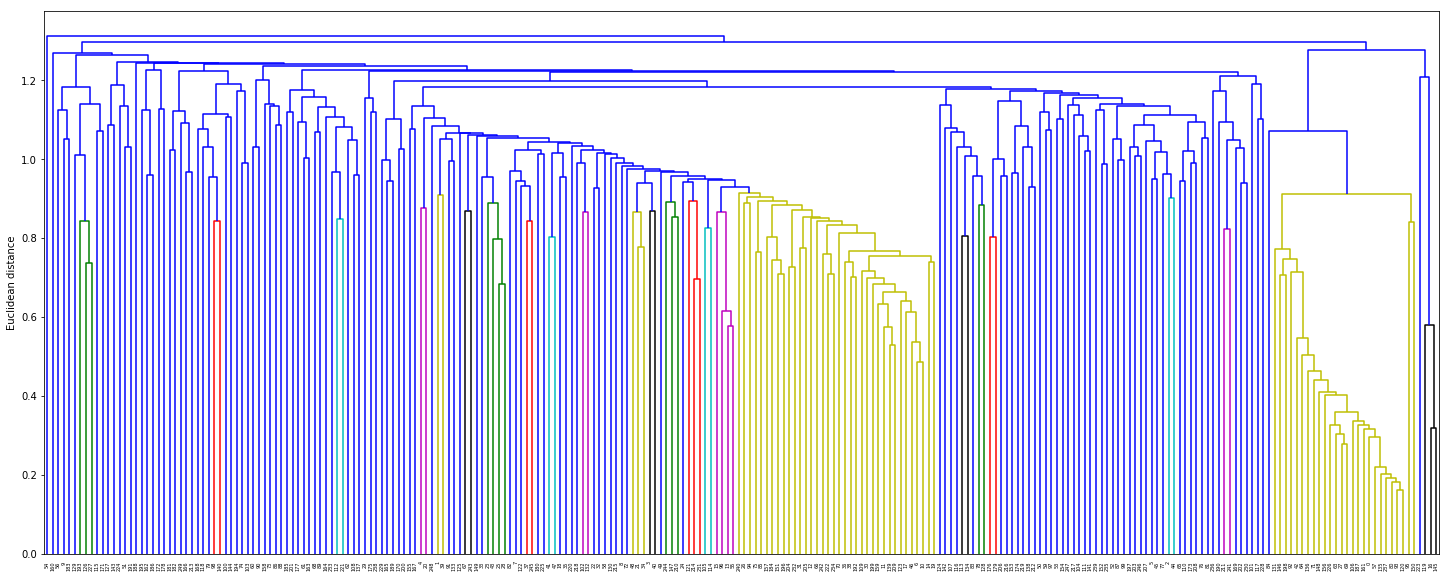

In [80]:
df = pd.DataFrame(X_vectors.todense())
df

plt.figure(figsize=(25, 10))
row_clusters = linkage(df.values, metric='euclidean', method='average') 
row_dendr = dendrogram(row_clusters)
plt.show()


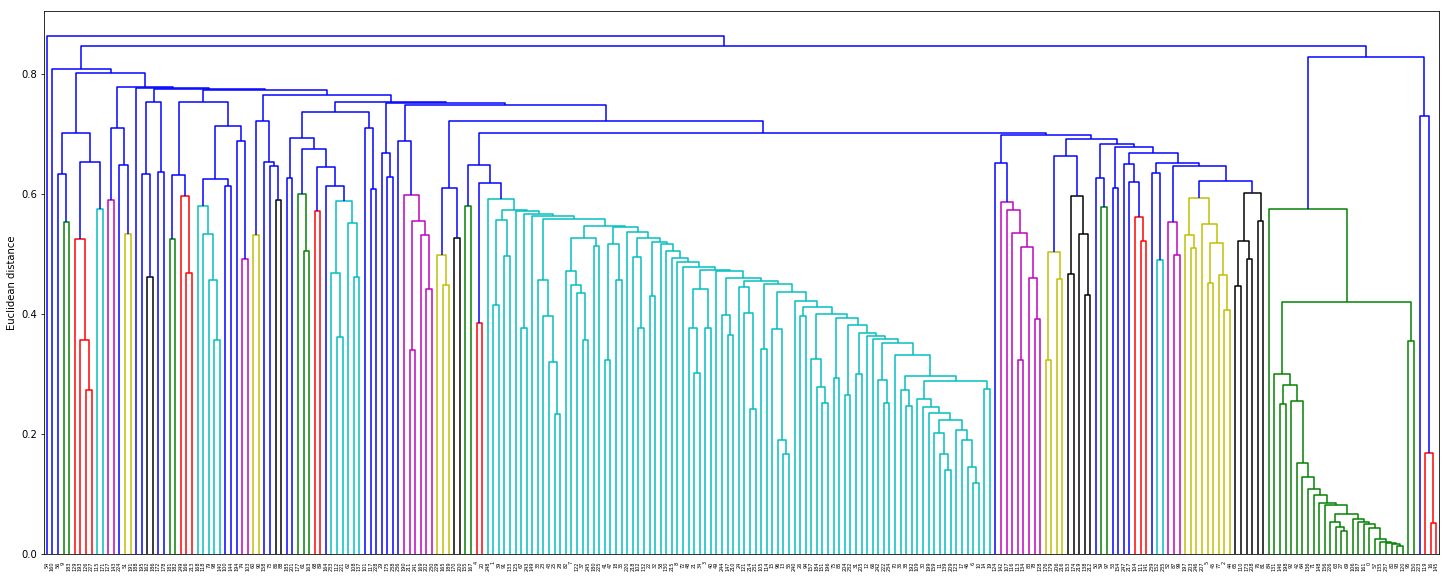

In [81]:
df = pd.DataFrame(X_vectors.todense())
df

plt.figure(figsize=(25, 10))
row_clusters = linkage(pdist(df, metric='cosine'), method='average') 
row_dendr = dendrogram(row_clusters)

plt.ylabel('Euclidean distance')
plt.show()


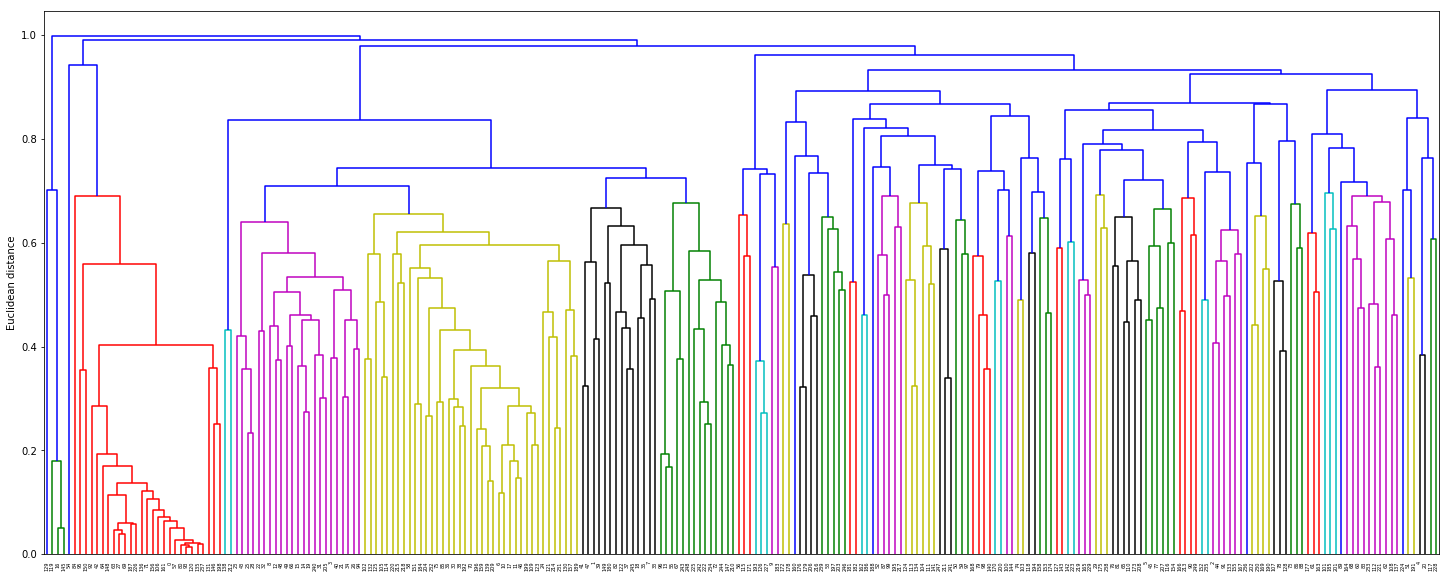

In [82]:
df = pd.DataFrame(X_vectors.todense())
df

plt.figure(figsize=(25, 10))
row_clusters = linkage(pdist(df, metric='cosine'), method='complete') 
row_dendr = dendrogram(row_clusters)

plt.ylabel('Euclidean distance')
plt.show()

# Zad 

Podziel dane na 20 grup

In [83]:
part = fcluster(row_clusters, 20, 'maxclust')
# print(part)
# print(np.unique(part))

ZADANIE: Prosze wypisać liczności grup

In [85]:
counts = np.unique(part, return_counts = True)

Dostaliśmy rozsądne liczności klastrów. 

Chcemy zobaczyć reprezentantów klastrów:
* średnie będą reprezentowały częstości słów
* możemy wylistować zdania będące najbliżej średnich

Wypisujemy najbardziej reprezentatywne słowa w klastrach (jakie są reprezentatywne?)

In [86]:
n_elements = len(set(part))

X_dense = X_vectors.todense()
centers = np.zeros((n_elements, X_dense.shape[1]))

for i in range(1,n_elements+1):
    centers[i-1] = np.mean(X_dense[part == i], axis = 0)
# print("---------------------------")
# print(centers)
# print("---------------------------")

In [81]:
top = 20
for i in range(n_elements):
    tops = np.argsort(centers[i,:])[-top:]#[::-1]
    print([w for w in vectorizer.vocabulary_ 
           if vectorizer.vocabulary_[w] in tops])

['univers', 'know', 'good', 'ani', 'question', 'problem', 'comput', "'s", 'anyon', '2', 'drive', 'onli', 'use', 'also', 'hard', "'ve", 'read', 'program', 'softwar', 'disk']
['wa', 'articl', '<', 'write', 'time', 'say', 'right', 'would', 'problem', 'get', 'becaus', "'s", 'work', 'new', '...', 'think', "'", '!', 'world', 'support']
['univers', 'nntp-posting-host', 'even', 'ani', 'question', 'would', 'get', "'s", 'work', 'file', 'doe', 'tri', 'find', 'use', 'help', 'thank', 'run', 'system', 'pc', 'window']
['univers', 'write', 'time', 'ani', 'need', 'ha', '-', 'way', 'get', 'work', 'file', '...', 'drive', 'use', 'version', 'read', 'run', 'program', 'pc', 'window']
['<', 'write', "''", '$', 'one', 'make', '``', 'ha', 'actual', 'way', 'anoth', 'go', 'doe', 'drive', 'think', 'use', 'could', 'run', 'system', '16']
['wa', 'univers', 'nntp-posting-host', '<', 'time', "''", 'state', "'d", 'peopl', 'one', '``', 'question', 'would', 'problem', 'doe', '...', 'think', 'use', 'hi', 'could']
['univers

# Zad

Wypiszmy teraz posty najbardziej reprezentujące klaster (zdania najbliższe średniej)

In [82]:

top = 1
import scipy.spatial.distance as dist

#macierz odległości zdanie-center
distances = [[dist.cosine(w,c) for w in X_dense] for c in centers] 
for i in range(n_elements):
    tops = np.argsort(distances[i])[-top:]
    for s in tops:
        print(X_set[s])
    print("-----------------------------------------------------------------------------")
#     print([w for w in tf_vectorizer.vocabulary_ if tf_vectorizer.vocabulary_[w] in tops])


# #wypiszmy teraz posty najbardziej reprezentujące klaster (zdania najbliższe średniej
# top = 2
# import scipy.spatial.distance as dist

From: weidlich@arb-phys.uni-dortmund.de (Weidlich)
Subject: Searching for a phonetic font
Organization: Institut f. Arbeitsphysiologie a.d. Uni Dortmund
Lines: 13

I'm searching for a phonetic TrueType font for Windows 3.1. If 
anybody knows one, please mail me!

Thanks.

dw 


##################################################################
Dipl.-Inform. Dietmar Weidlich    # IfADo, Ardeystr. 67          #
weidlich@arb-phys.uni-dortmund.de # D-4600 Dortmund 50           #
Phone ++49 231 1084-250           # >> Dr. B.: "Koennten Sie das #
Fax   ++49 231 1084-401           #      MAL EBEN erledigen?" << #

-----------------------------------------------------------------------------
From: sp@odin.NoSubdomain.NoDomain (Svein Pedersen)
Subject: Utility for updating Win.ini and system.ini
Organization: University of Tromsoe, Norway
Lines: 6

I nead a utility for updating (deleting, adding, changing) *.ini files for Windows. 

Do I find it on any FTP host?

Svein


-----------------------

ZADANIE: Porównaj wynik z LDA

In [83]:
n_elements = 20

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_elements)

In [84]:
lda_fit = lda.fit_transform(X_vectors)
lda_fit

C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


array([[ 0.01370614,  0.01370614,  0.01370614, ...,  0.73958339,
         0.01370614,  0.01370614],
       [ 0.00833627,  0.00833627,  0.00833627, ...,  0.84161092,
         0.00833627,  0.00833627],
       [ 0.0089653 ,  0.0089653 ,  0.0089653 , ...,  0.8296592 ,
         0.0089653 ,  0.0089653 ],
       ..., 
       [ 0.01032327,  0.01032327,  0.01032327, ...,  0.80385782,
         0.01032327,  0.01032327],
       [ 0.0085748 ,  0.0085748 ,  0.0085748 , ...,  0.83707876,
         0.0085748 ,  0.0085748 ],
       [ 0.00811239,  0.00811239,  0.00811239, ...,  0.84586452,
         0.00811239,  0.00811239]])

In [85]:
topics = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
topics

array([[ 0.00689118,  0.00859937,  0.00792056, ...,  0.0080575 ,
         0.00722571,  0.00980434],
       [ 0.00949874,  0.00735049,  0.00728561, ...,  0.00784694,
         0.00691652,  0.0108302 ],
       [ 0.00815575,  0.007704  ,  0.00723734, ...,  0.0089574 ,
         0.00680938,  0.00782879],
       ..., 
       [ 0.01478974,  0.00356745,  0.00962951, ...,  0.01364506,
         0.00448468,  0.00688001],
       [ 0.00788646,  0.00813337,  0.00716977, ...,  0.00820471,
         0.00649384,  0.0061042 ],
       [ 0.00809555,  0.00808316,  0.00798157, ...,  0.00752725,
         0.00712356,  0.00774088]])

In [94]:
top = 10
for i in range(n_elements):
    tops = np.argsort(topics[i,:])[-top:]#[::-1]
    print(i, " ", [w for w in vectorizer.vocabulary_ if vectorizer.vocabulary_[w] in tops])

0   ['wa', '``', 'question', '-', 'look', 'get', 'post', '2', '|', 'mac']
1   ['peopl', 'ani', '-', "'s", 'whi', 'help', '!', "'m", '|', 'card']
2   ['nntp-posting-host', 'file', '...', 'onli', 'call', "'", 'could', 'number', 'machin', 'window']
3   ["''", '$', '``', '-', '#', 'use', ';', '!', '|', 'card']
4   ['nntp-posting-host', 'say', 'make', 'must', 'better', 'thing', "'s", '2', 'believ', "'m"]
5   ['like', 'good', 'ani', 'look', 'drive', 'veri', 'hi', '!', "'m", 'card']
6   ["''", 'know', 'question', 'differ', 'comput', 'follow', 'think', "'", 'well', 'much']
7   ['wa', 'write', "''", 'know', 'would', 'use', 'version', 'read', 'still', 'window']
8   ['univers', 'nntp-posting-host', '$', 'know', '-', 'comput', 'thank', 'reply-to', 'window', 'card']
9   ['wa', 'nntp-posting-host', 'time', "''", 'look', "'s", 'post', 'file', '4', 'mac']
10   ["''", '``', 'need', '-', '#', '...', "'", 'help', 'pleas', '!']
11   ['univers', 'ani', 'need', 'littl', 'file', 'find', 'veri', 'anyth', 'ema